Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Note that this Pre-class Work is estimated to take **35 minutes**.

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = "Pedro"
COLLABORATORS = ""

---

# CS110 Pre-class Work - The rod-cutting problem

The pre-class work for this session will focus on the rod cutting problem. Recall that the rod cutting problem takes as an input the length $n$ of a rodand, a table of prices $p_i$ for $i = 1,2,... n$, and one needs to determine the maximum revenue $r$ obtainable by cutting up the rod and selling the pieces. 

## Part A. 

You will implement in Python two solutions to the rod cutting problem, namely:

## Question 1 [time estimate: 5 minutes] 
A recursive top-down solution to the rod cutting problem. Please complete the cut_rod function below:


In [7]:
def cut_rod(p,n):
    """
    A recursive top-down solution to the rod cutting problem as described in 
    Cormen et. al. (pp 363) This calculates the maximum revenue that could be 
    earned by cutting up a rod of length n.
    
    Parameters
    ----------
    p : list of floats
        The prices of rods of different lengths. p[i] gives the dollars
        of revenue the company earns selling a rod of length i+1.
    n : int
        Length of the rod
    
    Returns
    -------
    q : float
        The optimal revenue
        
    """
    if n == 0:
        return 0
    
    q = -float('inf')
    
    for i in range(1,n+1):
        q = max(q,p[i-1]+cut_rod(p,n-i))
        
    return q

In [5]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1

#results from textbook
r = [0,1,5,8,10,13,17,18,22,25,30]
for i in range(len(r)):
    assert(cut_rod(p,i)==r[i])

## Question 2 [time estimate: 10 minutes]

An optimal rod cutting solution using dynamic programming (see figure [here](https://drive.google.com/open?id=1nu9gETKX4KJCHZDi17fZLQtkDVig81Zk) for inspiration). Please complete the following two functions: 


In [63]:
def extended_bottom_up_cut_rod(p,n):
    """
    Implements a bottom-up dynamic programming approach to the rod cutting problem.
    Here, "extended" means the function is geared in a way amenable to reconstructing
    an optimal solution, on top of the returned optimal value. See Cormen et al.,
    p. 269 for the implementation details.
    
    Parameters
    ----------
    p : list of floats
        The prices of rods of different lengths. p[i] gives the dollars
        of revenue the company earns selling a rod of length i+1.
    n : int
        Length of the rod
    
    Returns
    -------
    r : list of floats
        The maximum revenues. r[i] gives the maximum revenue for a rod
        of length i. As such:
        
            >>> r[0] = 0
            >>> len(r) == n + 1
            
    s : list of ints
        The optimal sizes of the first piece to cut off. Also make sure 
        that:
            
            >>> s[0] = 0
            >>> len(s) == n + 1
            
    """
    r = [k for k in range(n+1)]
    s = [c for c in range(n+1)]
    
    for j in range(1, n+1):
        q = -float('inf')
        for i in range(1,j+1):
            if q < (p[i-1]+r[j-i]):
                q = p[i-1]+r[j-i]
                s[j]=i
        r[j]=q

    return r,s

In [66]:
def print_cut_rod_solution(p,n):
    """
    Gives a solution to the rod cutting problem of size n. 
    
    Parameters
    ----------
    p : list of floats
        The prices of rods of different lengths. p[i] gives the revenue 
        (in USD, for example) the company earns selling a rod of length i+1
    n : int
        Length of the rod
    
    Returns
    -------
    sol : a list of ints
        Indicates how to cut the rod. Cutting the rod with the lengths
        given in sol gives the optimal revenue.
  
            >>> print_cut_rod_solution(p,0) == []
            
    """
    sol = []
    s = extended_bottom_up_cut_rod(p,n)[1]
    while n > 0:
        sol.append(s[n])
        n -= s[n]
        
    return sol

In [67]:
# price list from textbook
p = [1,5,8,9,10,17,17,20,24,30] #p[i] gives the price of length i+1
# Result of R and S from textbook:
R = [0,1,5,8,10,13,17,18,22,25,30]
S = [0,1,2,3,2,2,6,1,2,3,10]
# Test:
r, s = extended_bottom_up_cut_rod(p,10)
assert(r==R)
assert(s==S)

## Part B - Experiments

## Question 1 [time estimate: 1 minute]

Use the function below to generate a list of prices of length n=20 and assign that list to a new variable, `P`. You MUST use this list for questions 2 and 3 below.


In [72]:
import numpy as np
def generate_price_list(n):
    """
    Generates a price list of length n
    
    Parameters
    ----------
    n : int
        Length of the list, must be positive
    
    Returns
    -------
    p : list
        The ordered price list for each rod cut
        
    """
    p = [1]
    for i in range(1,n):
        np.random.seed(0)
        p.append(np.random.randint(p[i-1]+1, i*3+1))
    return p



## Question 2 [time estimate: 5 minutes]

Time (using the time library) the implementation of `cut_rod` for different rod lengths for values of up to $n=20.$ Present your results in a plot. 


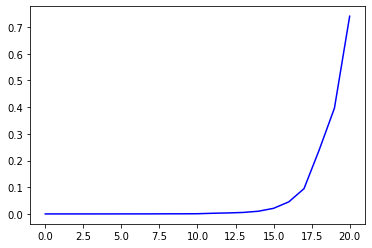

In [99]:
import time
import matplotlib.pyplot as plt 

p = generate_price_list(20)

n = 20
repeat = 10

times = []

for i in range(n+1):
    bigtime = 0
    for j in range(repeat):
        s = time.perf_counter()   #start timer
        cut_rod(p, i)
        e = time.perf_counter()  #end timer
        bigtime += (e-s)
    times.append(bigtime/repeat)

plt.plot(list(range(n+1)),times, c='blue')

## Question 3 [time estimate: 2 minutes]

Time (using the time library) the implementation of `extended_bottom_up_cut_rod` for different rod lengths for values of up to $n=20$. Add the curve corresponding to this algorithm to the previous plot.

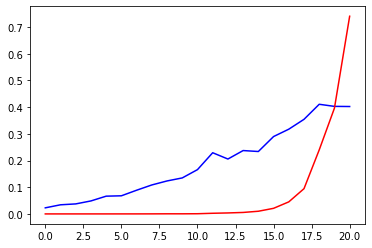

In [102]:
timesE = []

repeat = 1

for i in range(n+1):
    bigtime = 0
    for j in range(repeat):
        s = time.perf_counter()   #start timer
        extended_bottom_up_cut_rod(p, i)
        e = time.perf_counter()  #end timer
        bigtime += (e-s)*10000   
    timesE.append(bigtime/repeat)

#i'm multiplying the times for the extended_bottom_up_cut_rod by 10000  so we can actually vizualise how the curves compare
plt.plot(list(range(n+1)),timesE, c='blue') + plt.plot(list(range(n+1)),times, c='red')

## Question 4 [time estimate: 2 minutes]

Contrast both curves. What can you conclude?

First thing is that the second curve is 10000 times smaller than the first one. Second is that while the first one seems to be scaling exponetialy the second seems to be scaling linearly.

## Part C - After completing your experiments above, answer the following questions:

## Question 1 [time estimate: 5 minutes]
Estimate how big $n$ has to be before the non-dynamic-programming version will take a million years to finish. Call this value N.

if we say that time is roughly 2^(n-1) x 10^-4 seconds, and 1000000 years has more or less 3x10^13 seconds, than 2^(n-1) = 10^17. n is aproximatly 57

## Question 2 [time estimate: 5 minutes]
Estimate (or time) how long it takes to evaluate `extended_bottom_up_cut_rod(p,N)`, where `N` is the value you got from the previous question. 

In [106]:
p = generate_price_list(57)
s = time.perf_counter()   #start timer
extended_bottom_up_cut_rod(p, 57)
e = time.perf_counter()  #end timer
bigtime = (e-s)
print(bigtime,'seconds')

0.00044239999988349155 seconds


## [Optional]  Question 3 [time estimate: 5 minutes]
Do you notice anything peculiar about the solution for large n?

YOUR ANSWER HERE